## Самостоятельная работа 3. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [344]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.__version__

'2.1.0'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [345]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('../dataframes/adult.csv', na_values='?')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элеметнов датасета

In [346]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [347]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски?

In [349]:
df.isna().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Так как есть пропуски в колонках в workclass и в occupation, можно предположить, что эти люди - безработные. 

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [350]:
df["workclass"].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

7) Какой средний возраст женщин и мужчин?

In [351]:
male = df[df['sex'] == 'Male']['age'].mean()
female = df[df['sex'] == 'Female']['age'].mean()

print(f'Male = {male} & Female = {female}')




Male = 39.43354749885268 & Female = 36.85823043357163


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

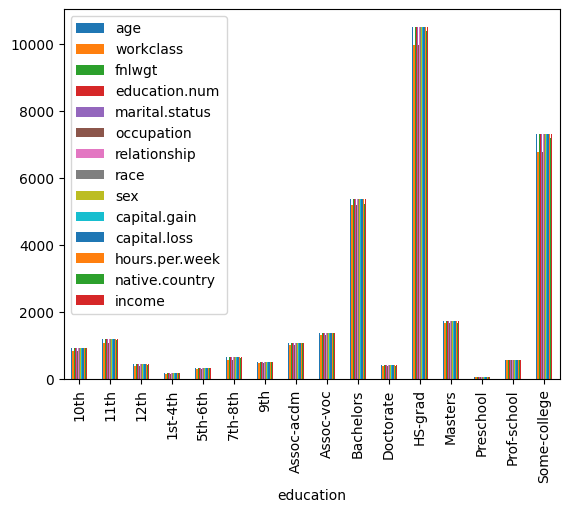

In [352]:
df.groupby('education').count().plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [353]:
meanrich = df[df['income'] == '>50K']['age'].mean()
stdrich = df[df['income'] == '>50K']['age'].std()
meanpoor = df[df['income'] == '<=50K']['age'].mean()
stdpoor = df[df['income'] == '<=50K']['age'].std()

print(f'Средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год составляют {meanrich} и {stdrich} соответственно')
print(f'Средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год составляют {meanpoor} и {stdpoor} соответственно')


Средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год составляют 44.24984058155847 и 10.519027719851826 соответственно
Средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год составляют 36.78373786407767 и 14.020088490824879 соответственно


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [354]:
df[df['income'] == '>50K']['education'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

education
Bachelors       28.33%
HS-grad         21.36%
Some-college    17.69%
Masters         12.23%
Prof-school      5.39%
Assoc-voc         4.6%
Doctorate         3.9%
Assoc-acdm       3.38%
10th             0.79%
11th             0.77%
7th-8th          0.51%
12th             0.42%
9th              0.34%
5th-6th           0.2%
1st-4th          0.08%
Name: proportion, dtype: object

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [355]:
married = df[(df['sex'] == 'Male') & (df['income'] == '>50K') & (df['marital.status'].str.startswith('Married'))]
not_married = df[(df['sex'] == 'Male') & (df['income'] == '>50K') & ~(df['marital.status'].str.startswith('Married'))]
print(len(married),len(not_married))

5965 697


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [356]:
df.groupby(['native.country','income'])['hours.per.week'].mean()

native.country  income
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                >50K      45.641026
China           <=50K     37.381818
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours.per.week, Length: 80, dtype: float64

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [362]:
df['diff'] = df['capital.gain'] - df['capital.loss']
df['diff'] = df['diff'].apply(lambda x: np.log(x) if x > 0 else 0)
df['diff'] = df['diff'].round(0).astype(int)
df["diff"].value_counts()
df.pivot_table(['diff'], ['education', 'income'], aggfunc='mean')

diff
education    income          
10th         0       0.287026
             1       1.274194
11th         0       0.226009
             1       3.016667
12th         0       0.237500
             1       2.515152
1st-4th      0       0.197531
             1       1.500000
5th-6th      0       0.249211
             1       2.250000
7th-8th      0       0.445545
             1       1.550000
9th          0       0.429158
             1       1.111111
Assoc-acdm   0       0.288030
             1       1.841509
Assoc-voc    0       0.443683
             1       1.961219
Bachelors    0       0.352585
             1       2.129221
Doctorate    0       0.514019
             1       2.238562
HS-grad      0       0.344437
             1       1.678209
Masters      0       0.505236
             1       2.267987
Preschool    0       0.372549
Prof-school  0       0.516340
             1       3.449173
Some-college 0       0.288449
             1       1.731074

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [358]:
df['income'] = df["income"].map({"<=50K": 0, ">50K": 1})
df[df["sex"] == "Female"].groupby(['native.country'])['income'].mean().sort_values(ascending=False)

native.country
Yugoslavia                    0.333333
Taiwan                        0.266667
Japan                         0.250000
France                        0.250000
Iran                          0.250000
China                         0.238095
Italy                         0.238095
Canada                        0.230769
Scotland                      0.200000
Greece                        0.200000
England                       0.187500
India                         0.181818
Hong                          0.166667
Portugal                      0.166667
Hungary                       0.166667
Philippines                   0.164384
Ireland                       0.142857
Honduras                      0.142857
Laos                          0.125000
Germany                       0.116667
United-States                 0.110721
Poland                        0.105263
South                         0.100000
Thailand                      0.090909
Nicaragua                     0.083333
Cuba      

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [368]:
df = pd.read_csv('../dataframes/adult.csv', na_values='?')
df['where'] = np.where(df['income'] == '<=50K', np.random.randint(0, 50), np.random.randint(51, 201))
meanran = df.groupby(['education'])['where'].mean()
print(meanran)

education
10th             30.233655
11th             27.863830
12th             31.736721
1st-4th          25.500000
5th-6th          27.399399
7th-8th          29.535604
9th              28.089494
Assoc-acdm       58.247423
Assoc-voc        60.227207
Bachelors        83.871895
Doctorate       134.101695
HS-grad          44.564327
Masters         105.714452
Preschool        20.000000
Prof-school     133.093750
Some-college     49.296119
Name: where, dtype: float64
